In [2]:
import matplotlib.pyplot as plt
import numpy as np
import metrics as met
%matplotlib inline
%load_ext autoreload

In [3]:
#Datasets for tests
#https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
number_of_samples = 500
X, y = make_classification(n_features = 2, n_redundant = 0, n_informative = 2,
                           random_state = 1, n_clusters_per_class = 1, n_samples = number_of_samples)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size = X.shape)
linearly_separable = (X, y)
datasets = [make_moons(noise = 0.3, random_state = 0, n_samples = number_of_samples),
            make_circles(noise = 0.2, factor = 0.5, random_state = 1, n_samples = number_of_samples),
            linearly_separable]
ds = datasets[2]
# preprocess dataset, split into training and test part
X, y = ds
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .4, random_state = 42)

In [4]:
# initialization of classifiers
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [KNeighborsClassifier(3),
               SVC(kernel = "linear", C = 0.025),
               SVC(gamma = 2, C = 1),
               GaussianProcessClassifier(1.0 * RBF(1.0)),
               DecisionTreeClassifier(max_depth = 5),
               RandomForestClassifier(max_depth = 5, n_estimators = 10, max_features = 1),
               MLPClassifier(alpha = 1, max_iter = 1000),
               AdaBoostClassifier(),
               GaussianNB(),
               QuadraticDiscriminantAnalysis()]

Classifier:  Nearest Neighbors
integral ROC_curve = 0.892239455758974


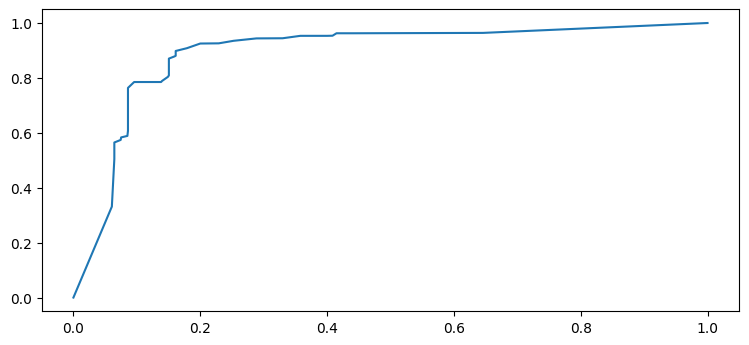

integral PR_curve = 0.5601459792028565


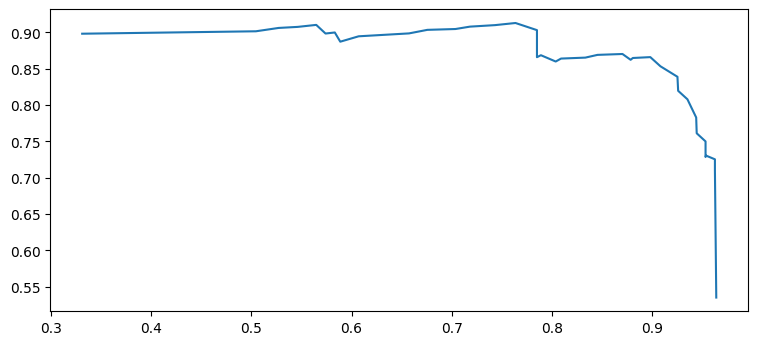

Classifier:  Linear SVM
integral ROC_curve = 0.9200869623646015


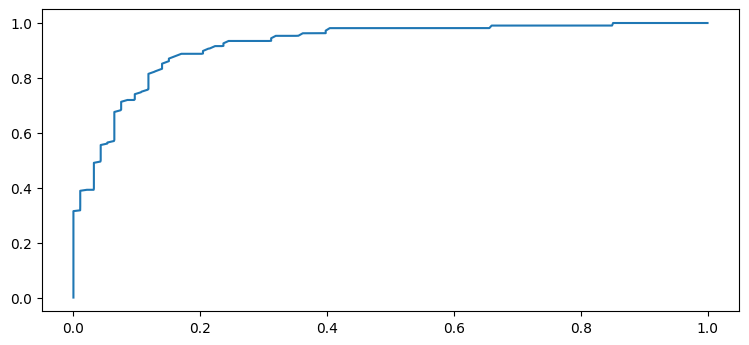

integral PR_curve = 0.9183166486854558


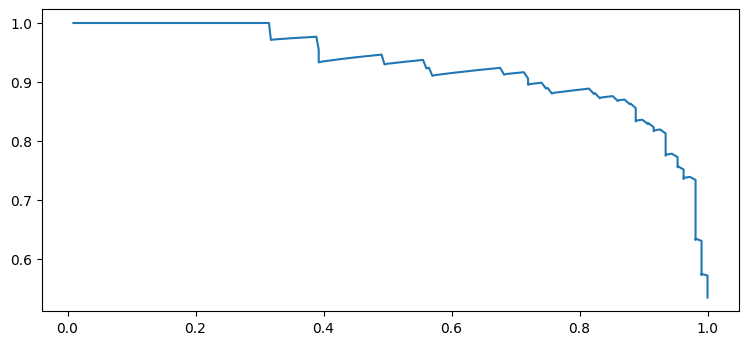

Classifier:  RBF SVM
integral ROC_curve = 0.8998475508716114


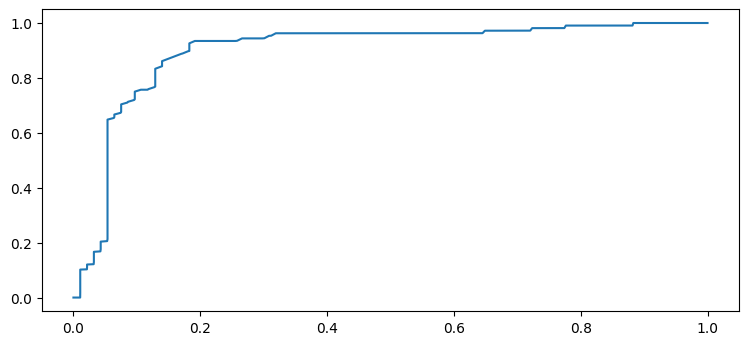

integral PR_curve = 0.8586635252192353


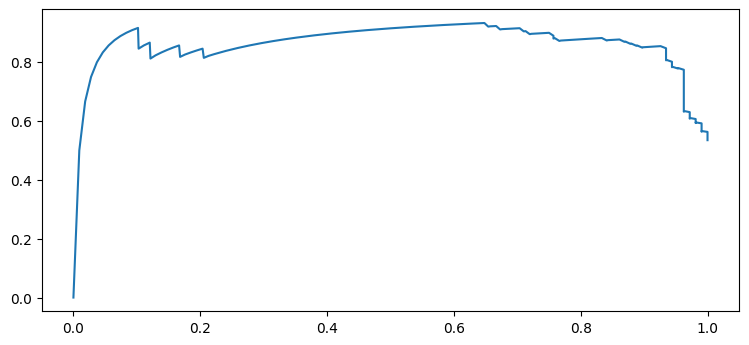

Classifier:  Gaussian Process
integral ROC_curve = 0.9246468253939972


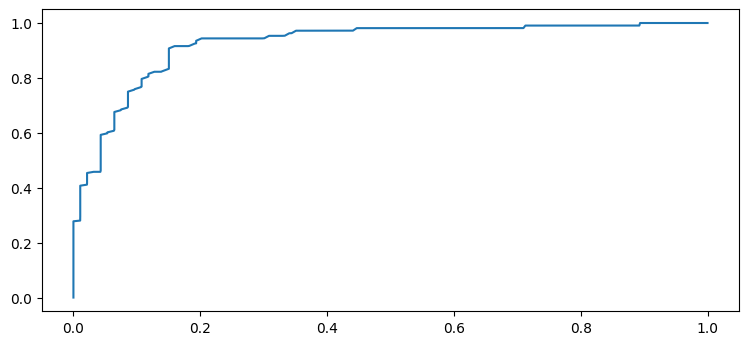

integral PR_curve = 0.9220729262227139


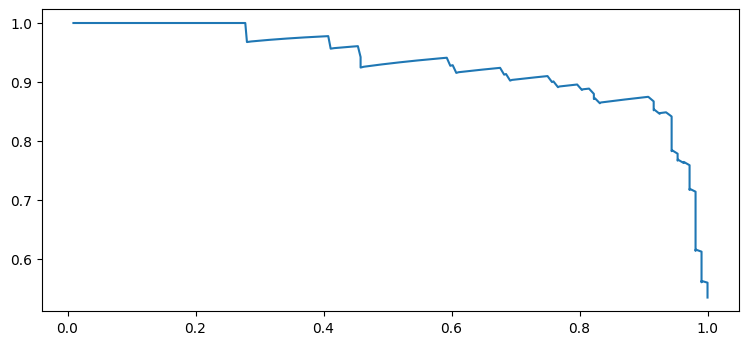

Classifier:  Decision Tree
integral ROC_curve = 0.8981086818591353


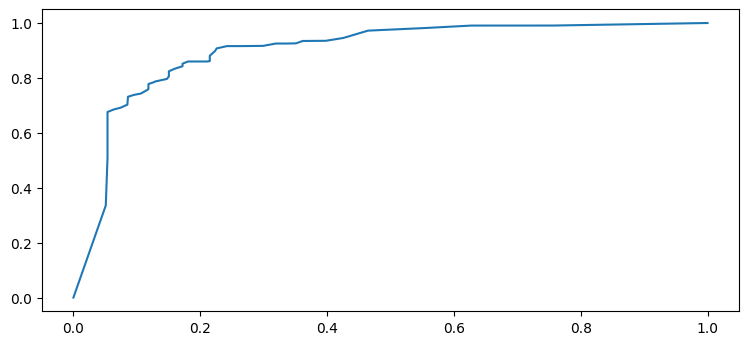

integral PR_curve = 0.5757570500407783


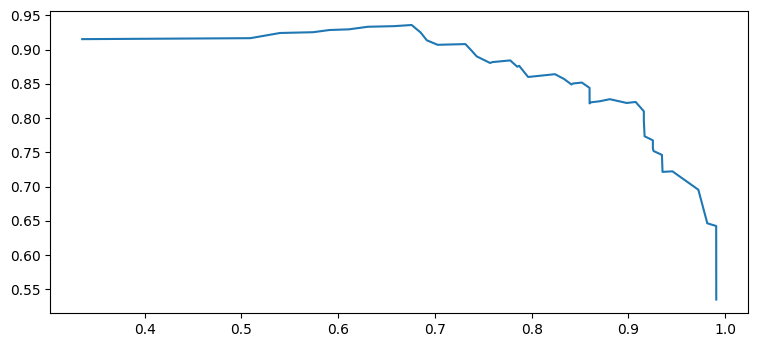

Classifier:  Random Forest
integral ROC_curve = 0.927388994447393


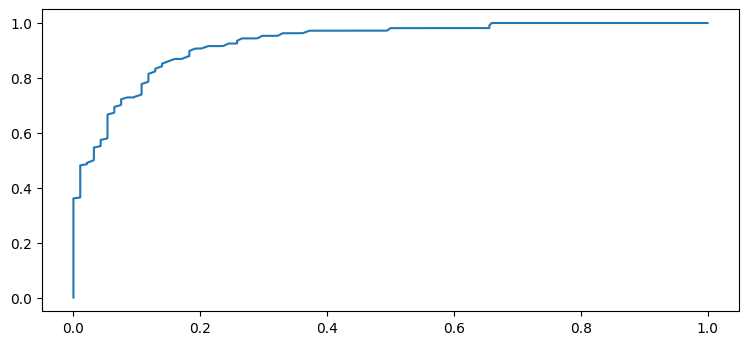

integral PR_curve = 0.9181454985479148


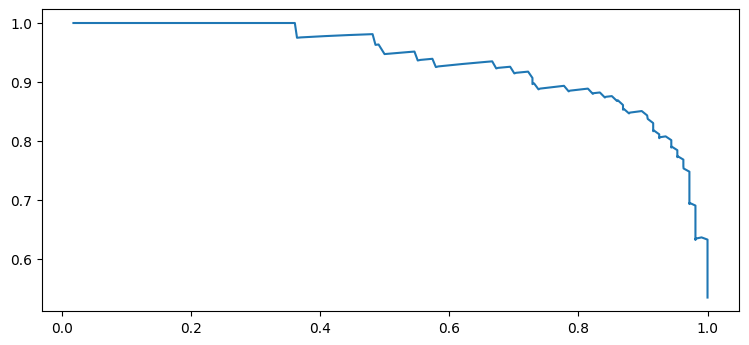

Classifier:  Neural Net
integral ROC_curve = 0.9245261097739841


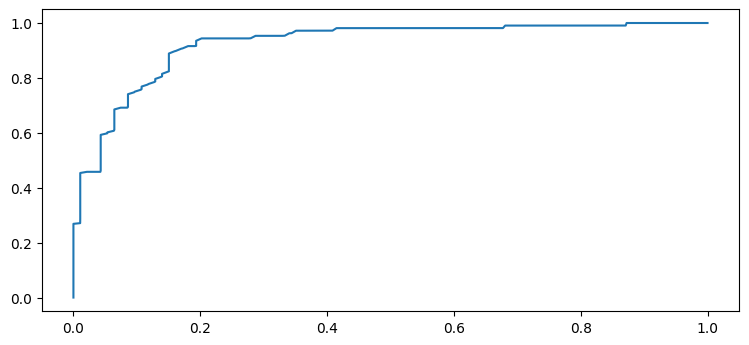

integral PR_curve = 0.9219201693037293


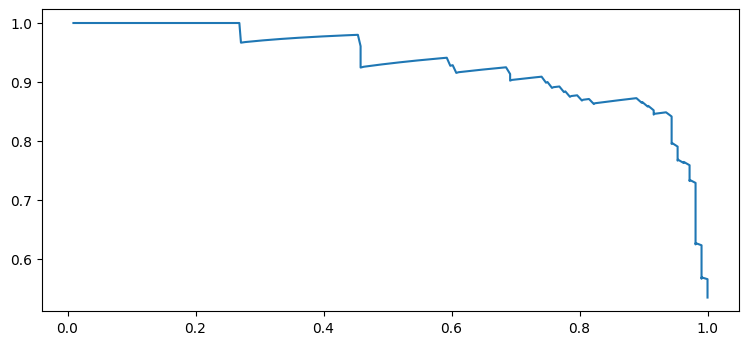

Classifier:  AdaBoost
integral ROC_curve = 0.9049358191925121


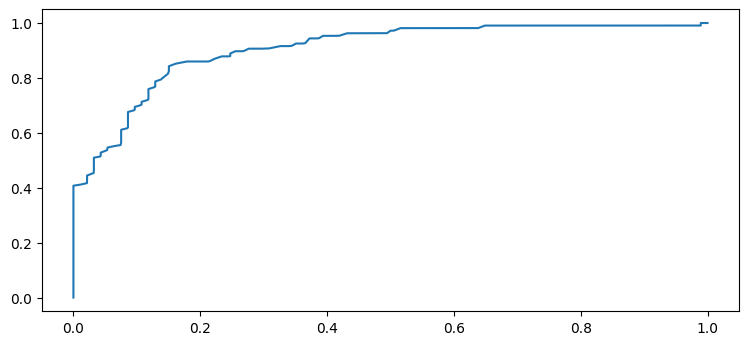

integral PR_curve = 0.9103098319767996


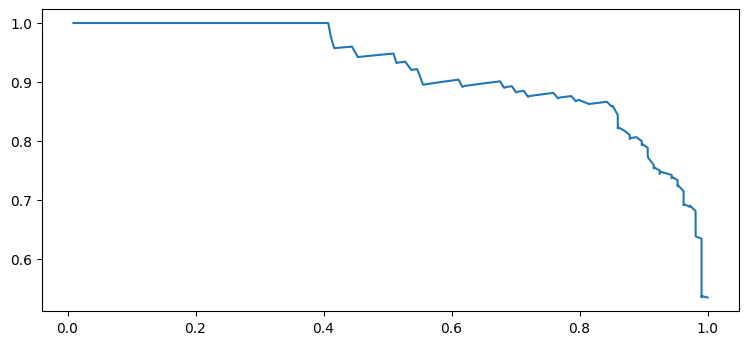

Classifier:  Naive Bayes
integral ROC_curve = 0.9104649276727834


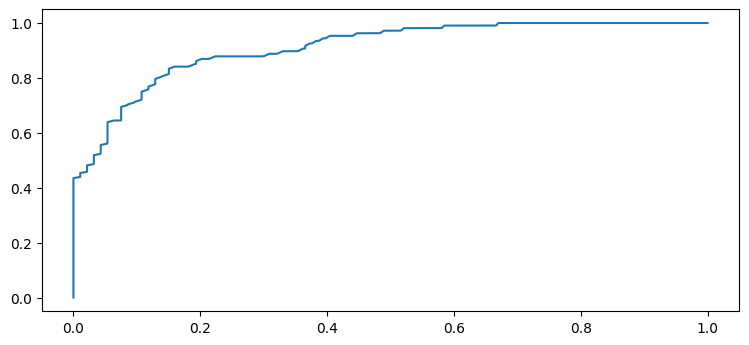

integral PR_curve = 0.9163841376557748


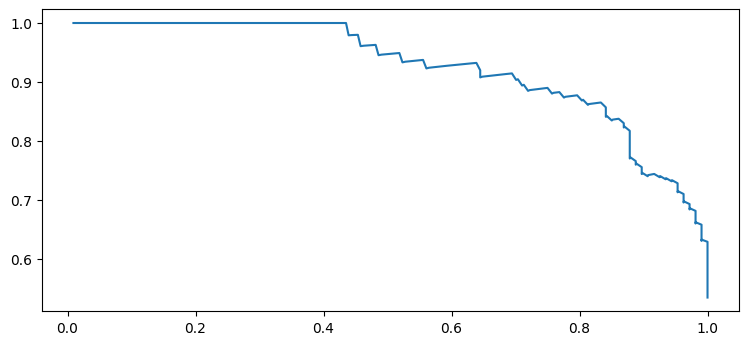

Classifier:  QDA
integral ROC_curve = 0.9266109264394747


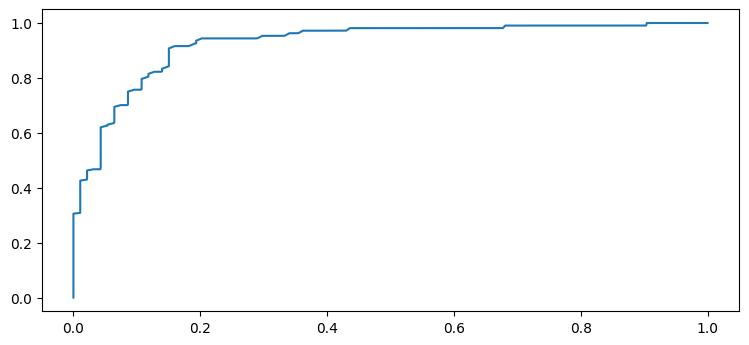

integral PR_curve = 0.9248798511780683


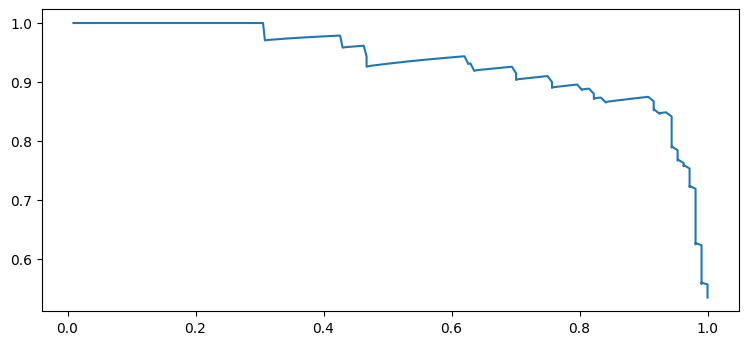

In [5]:
# Вместо getZ сделать рандомный значения np.random.rand, чтобы получить площадь ROC кривой 0.5
from sklearn.calibration import CalibratedClassifierCV
# setting plots
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = [9, 4]
# draw ROC and PR for each classifier
for classifier_name in names:
        print('Classifier: ', classifier_name)
        classifier = \
        CalibratedClassifierCV(classifiers[names.index(classifier_name)])
        classifier.fit(X_train, y_train)
        Z = met.getZ(classifier, X_test)
        sortedArgs = np.argsort(Z)
        ZSorted = Z[sortedArgs][::-1] # [::-1] == inderect order
        y_testSorted = y_test[sortedArgs][::-1]
        #ROCCurve
        met.drawROCCurve(ZSorted, y_testSorted)
        #PRCurve
        met.drawPRCurve(ZSorted, y_testSorted)

a[start:stop]   items start through stop-1

a[start:]       items start through the rest of the array

a[:stop]        items from the beginning through stop-1

a[:]            a copy of the whole array

integral ROC_curve = 0.5121018468857662


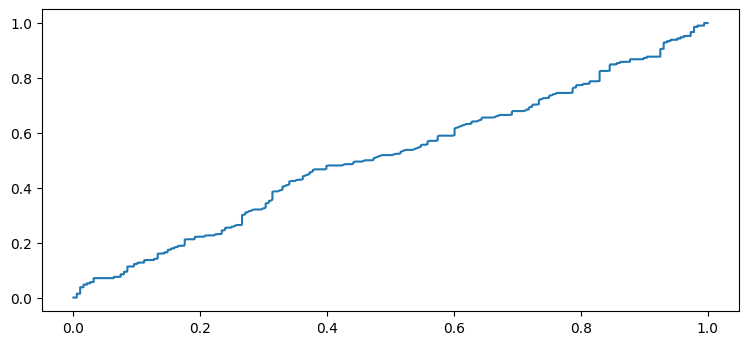

integral PR_curve = 0.5535732123002362


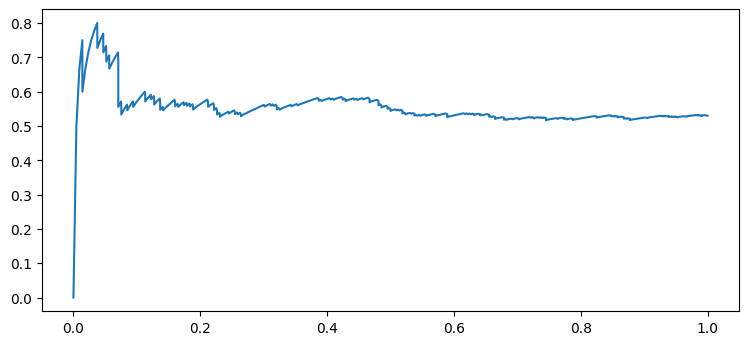

In [11]:
# Вместо getZ сделать рандомный значения np.random.rand, чтобы получить площадь ROC кривой 0.5
Z = np.random.rand(400)
sortedArgs = np.argsort(Z)
ZSorted = Z[sortedArgs][::-1] # [::-1] == inderect order
y_testSorted = np.random.randint(2, size = 400)
#ROCCurve
met.drawROCCurve(ZSorted, y_testSorted)
#PRCurve
met.drawPRCurve(ZSorted, y_testSorted)